In [6]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
#Do more injuries occur as the season progresses and does the time of season affect the type of injury?
df = pd.read_csv("injury_data_updated copy.csv")
df.head()

,Unnamed: 0,Season Year,Week,Team Name,Team City,Player,Player Jersey,Position,Injury Status,Injury Status Date,Practice Status,Injury Type
0,0,2023.0,1.0,Cowboys,Dallas,Jourdan Lewis,2.0,CB,NaN,2023-09-08T00:00:00+00:00,Full Participation In Practice,Foot
1,1,2023.0,1.0,Cowboys,Dallas,Tyler Smith,73.0,OL,Doubtful,2023-09-08T00:00:00+00:00,Did Not Participate In Practice,Hamstring
2,2,2023.0,1.0,Cowboys,Dallas,Sam Williams,54.0,DE,Questionable,2023-09-08T00:00:00+00:00,Full Participation In Practice,Foot
3,3,2023.0,1.0,Cowboys,Dallas,Donovan Wilson,6.0,SAF,Doubtful,2023-09-08T00:00:00+00:00,Did Not Participate In Practice,Calf
4,4,2023.0,1.0,Cowboys,Dallas,Malik Hooker,28.0,SAF,Questionable,2023-09-09T00:00:00+00:00,Did Not Participate In Practice,Illness


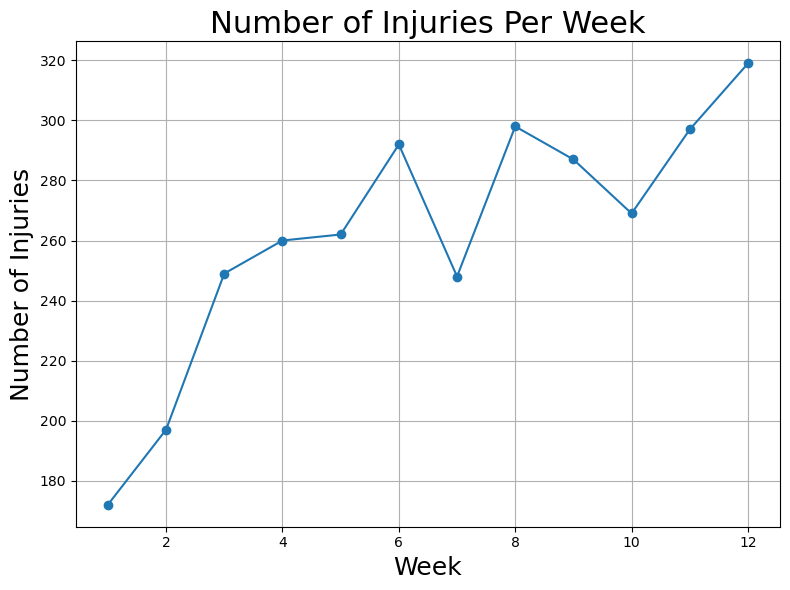

In [29]:
#Do more injuries occur as the season progresses?
# Group by Week
injuries_per_week = df.groupby("Week").size()

#plot
plt.figure(figsize=(8, 6))
injuries_per_week.plot(kind="line", marker='o')
plt.title("Number of Injuries Per Week", fontsize = 22)
plt.xlabel("Week", fontsize=18)
plt.ylabel("Number of Injuries", fontsize=18)
plt.grid(True)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

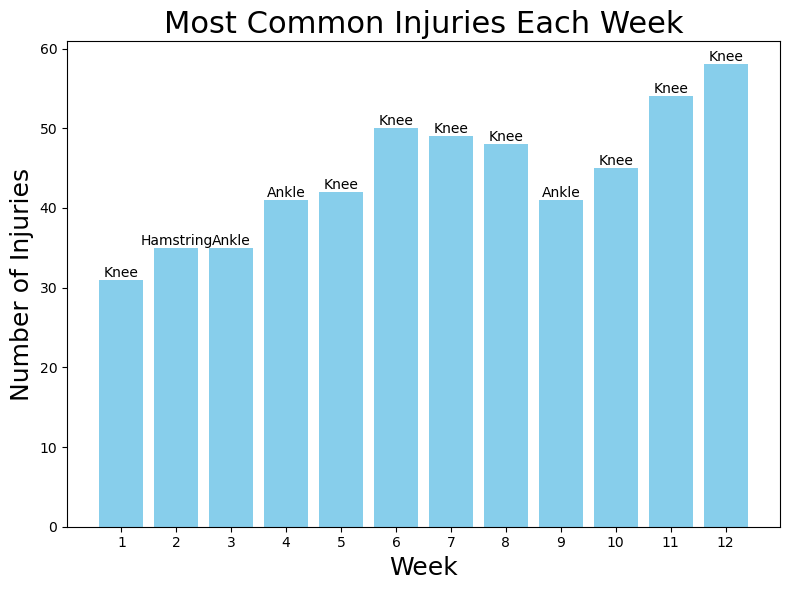

In [27]:
#Does time in season affect type of injury?
# Group by Week and Injury Type and count the occurrences
injury_counts = df.groupby(["Week", "Injury Type"]).size().reset_index(name='Count')

# Identify the most common injury type for each week
most_common_injuries = injury_counts.loc[injury_counts.groupby("Week")["Count"].idxmax()].reset_index(drop=True)

# Plot 
plt.figure(figsize=(8, 6))
bars = plt.bar(most_common_injuries["Week"], most_common_injuries["Count"], color='skyblue')

# Add labels to the bars with the injury type
for bar, injury_type in zip(bars, most_common_injuries["Injury Type"]):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), injury_type, ha='center', va='bottom')

plt.title("Most Common Injuries Each Week",fontsize = 22)
plt.xlabel("Week", fontsize=18)
plt.ylabel("Number of Injuries", fontsize=18)
plt.xticks(most_common_injuries["Week"])
plt.tight_layout()
plt.show()